<a href="https://colab.research.google.com/github/GowriRamesh2006/NAN-MUDHALVAN-GOWRI/blob/main/Naanmudhalvan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

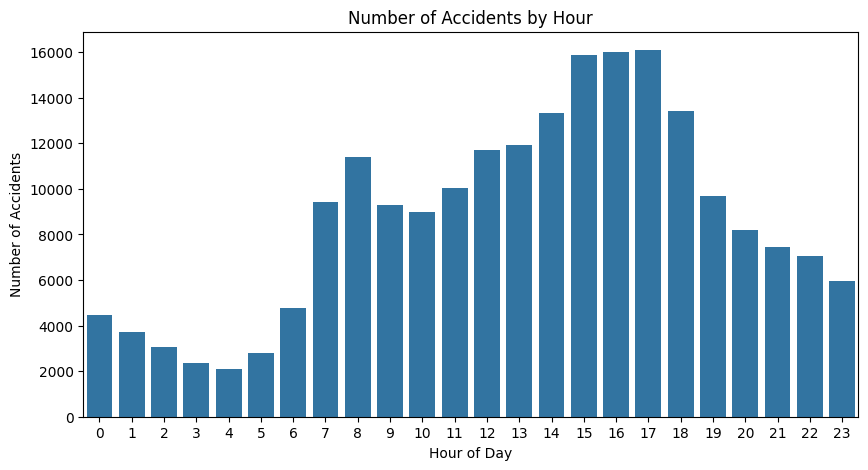

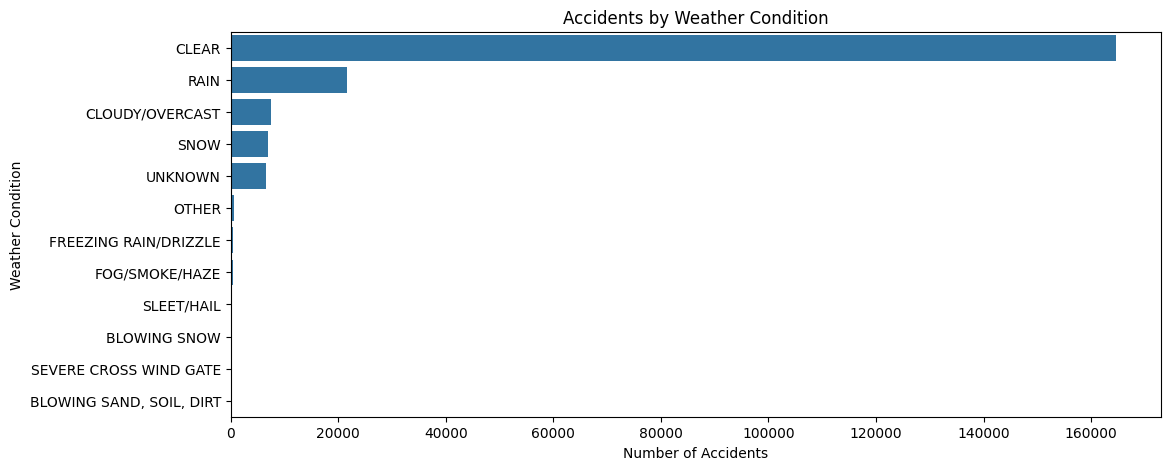

Accuracy: 0.9116766467065869

Confusion Matrix:
 [[57176   667]
 [ 4879    70]]

Classification Report:
               precision    recall  f1-score   support

      INJURY       0.92      0.99      0.95     57843
   NO INJURY       0.09      0.01      0.02      4949

    accuracy                           0.91     62792
   macro avg       0.51      0.50      0.49     62792
weighted avg       0.86      0.91      0.88     62792



In [15]:
# Install dependencies (if not already)
# pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv("traffic_accidents.csv")

# Basic EDA: Number of accidents by hour
plt.figure(figsize=(10,5))
sns.countplot(x='crash_hour', data=df)
plt.title('Number of Accidents by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

# Accidents by Weather Condition
plt.figure(figsize=(12,5))
sns.countplot(y='weather_condition', data=df, order=df['weather_condition'].value_counts().index)
plt.title('Accidents by Weather Condition')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

# Prepare data for prediction: Predict 'most_severe_injury'
# Simplify to classify as 'INJURY' vs 'NO INJURY'
df['injury_class'] = df['most_severe_injury'].apply(lambda x: 'INJURY' if 'INJURY' in x else 'NO INJURY')

# Select features and encode categorical data
features = ['weather_condition', 'lighting_condition', 'trafficway_type', 'roadway_surface_cond', 'crash_hour', 'crash_day_of_week', 'crash_month']
X = df[features]
y = df['injury_class']

# Encode categorical variables
X_encoded = pd.get_dummies(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))